# Social network ads conversion prediction

## Introduction

Artificial intelligence is commonly used in various spheres to automate processes, gather insights, and speed up processes. You will use Python to study an interesting use of artificial intelligence in a real-life scenario - how AI can be used to predict whether a social media user will buy a product shown in an ad based on other informations.


## Context

We will be working with a categorical dataset to determine whether a user purchased a particular product. The dataset can be downloaded from Kaggle (https://www.kaggle.com/datasets/rakeshrau/social-network-ads).


## Use Python to open csv files

We will use the [pandas](https://pandas.pydata.org/), [matplotlib](https://matplotlib.org/) and [scikit-learn](https://scikit-learn.org/stable/) libraries to work with our dataset. Pandas is a popular Python library for data science. It offers powerful and flexible data structures to make data manipulation and analysis easier. Scikit-learn is a very useful machine learning library that provides efficient tools for predictive data analysis. Matplotlib is a Python 2D plotting library that we can use to produce high quality data visualization. It is highly usable (as you will soon find out), you can create simple and complex graphs with just a few lines of codes!

In [1]:
#logistic regression example
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Enter the path where you have saved the dataset
df=pd.read_csv('C:\Python projects\Artificial_Neural_Networks\Artificial_Neural_Networks\Social_Network_Ads_logistic regression.csv')

In [4]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


#### Converting the categorical variable to numbers

In [5]:
gender_to_idx = {'Male': 0, 'Female': 1}
df.replace(gender_to_idx, inplace=True)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


In [8]:
#Dropping the variable which will not be important to the model for classifying
df.drop(["User ID"], axis = 1, inplace = True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


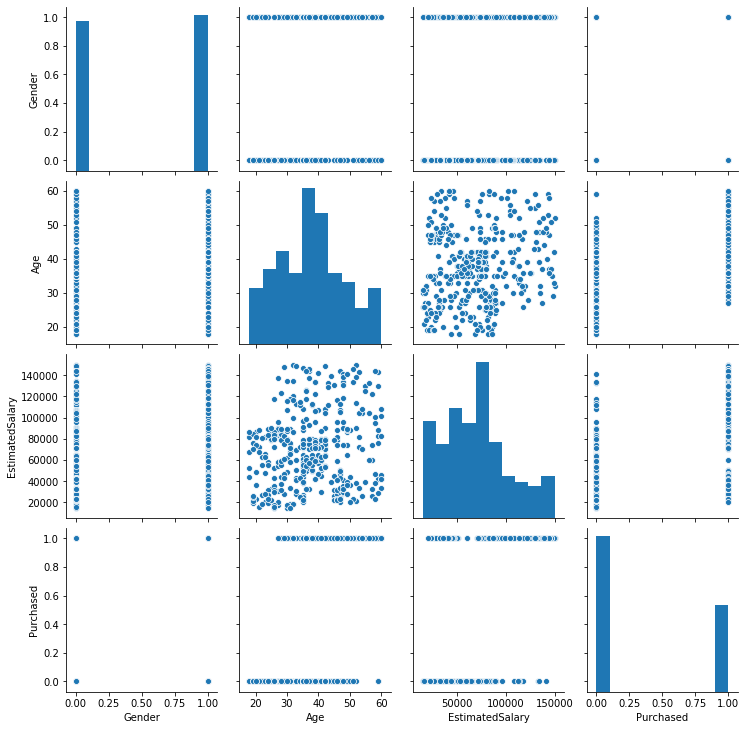

In [9]:
sns.pairplot(df)

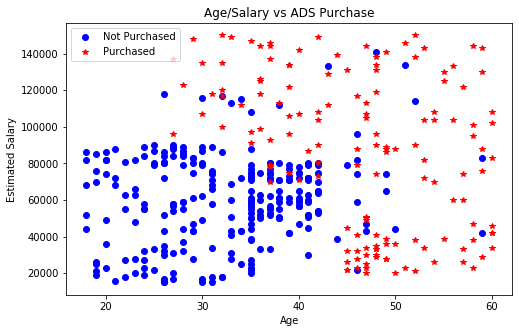

In [13]:
#Viewing the dataset plotted with respect to the two classes
abc_zero = df[df['Purchased'] == 0].index
abc_one = df[df['Purchased'] == 1].index
plt.figure(figsize=(8,5))
plt.title("Age/Salary vs ADS Purchase")
plt.plot(df['Age'][abc_zero], df['EstimatedSalary'][abc_zero], 'bo', label='Not Purchased')
plt.plot(df['Age'][abc_one], df['EstimatedSalary'][abc_one], 'r*', label='Purchased')
plt.ylabel('Estimated Salary')
plt.xlabel('Age')
plt.legend()
plt.show()

In [10]:
# Features
X = df.drop('Purchased', axis =1).values
# Target
y= df.Purchased.values

In [11]:
X

array([[    0,    19, 19000],
       [    0,    35, 20000],
       [    1,    26, 43000],
       ...,
       [    1,    50, 20000],
       [    0,    36, 33000],
       [    1,    49, 36000]], dtype=int64)

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

# **Split data into separate training and test set**

Split the dataset into training dataset and test dataset. The training dataset is used to train the model while the test dataset is used to test the model’s performance on new data.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train

array([[     1,     27,  57000],
       [     0,     46,  28000],
       [     1,     39, 134000],
       [     1,     44,  39000],
       [     1,     57,  26000],
       [     0,     32, 120000],
       [     0,     41,  52000],
       [     0,     48,  74000],
       [     0,     26,  86000],
       [     0,     22,  81000],
       [     0,     49,  86000],
       [     1,     36,  54000],
       [     0,     40,  59000],
       [     1,     41,  80000],
       [     0,     26,  16000],
       [     1,     39,  79000],
       [     0,     59, 130000],
       [     0,     42,  64000],
       [     1,     53, 143000],
       [     0,     34, 112000],
       [     1,     57, 122000],
       [     1,     39,  71000],
       [     0,     47,  25000],
       [     0,     24,  19000],
       [     1,     36,  50000],
       [     1,     32, 150000],
       [     1,     48,  29000],
       [     0,     30, 107000],
       [     0,     60,  34000],
       [     0,     38,  61000],
       [  

In [15]:
y_train

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,

####  Scaling the dataset

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Model training**

Create a LogistiRegression object and fit it with out dataset.The Logistic Regression model is a widely used statistical model which is primarily used for classification purposes.
It means that given a set of observations, Logistic Regression algorithm helps us to classify these observations into two or more discrete classes. So, the target variable is discrete in nature.

In [17]:
from sklearn.linear_model import LogisticRegression
lin_reg = LogisticRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

### Model Evaluation

In [18]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion matrix',cm)

Confusion matrix [[50  2]
 [ 7 21]]


In [19]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [20]:
y_test

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1], dtype=int64)